In [1]:
import pandas as pd
import seaborn as sns

In [2]:
uber_df = pd.read_csv('data/uber_requests.csv')

#### ❓Perform basic data exploration and in a markdown cell answer to these questions : 
* What is the name and dtype of the columns of the dataset ?
* How many rows has the dataset ?
* Which column has null values and how many ? 
* What is the Status of 5 first rows ?

Answer : 

#### ❓What are the two possible Pickup point ? Prove it with a coding cell. 

#### ❓Same question with Status

#### ❓ Create a new dataframe called uber_notcompleted_df with all trips except for the Completed ones ? (hint use the != "Time Completed" comparison)

#### ❓ How many rows has this new dataset ? Do you remember where you saw that number ? 

#### ❓On the uber_df dataframe drop a useless column and justify yourself

#### ❓Using Seaborn or not, plot the number of trips for each status (bar chart)

#### ❓Using Seaborn or not, to plot the number of trips for each "Pick up Point"

#### ❓Using Seaborn plot the status of trips per Pickup Points (Meaning, for Airport, how many Cancelled, completed, and no car available)

#### ❓Create 2 new columns called Supply and Demand : 
* Supply is equal to 1 if Status is "Trip Completed". Otherwise it's 0
* Demand is equal to 1 no matter what
* After Check that the changes took effect

#### ❓Create the Gap column that is simply the difference of Demand and Supply. What does a Gap of 1 mean in real world ?

Answer : 

####  ❓[Optional] Play with the hours
The Goal is to transform the request time stamp into a more understandable data. We will try to transform the timestamps into these data "Morning" 'Afternoon', 'Evening', 'Night'

First Step : Transform the datatypes of Request timestamp and Drop timestamp into datetime object : 
Hint : Check the pd.to_datetime function(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

Second Step : Create a new column named "Request Hour" That only takes the hour of the request. 
Hint : Check the .dt function and the .hour function (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html)

Third Step : Create a new column named "Request moment" with these rules : 
* If Hour of request is between Midnight and 6 a.m it's the Night. 
* If Hour of request is between 6am and 12am it's the Morning. 
* If Hour of request is between 12am and 6pm it's the Afternoon. 
* If Hour of request is between 6pm and Midnight it's the Evening. 

In [35]:
uber_df["Request timestamp"] = pd.to_datetime(uber_df["Request timestamp"])

In [36]:
uber_df["Request_hour"] = uber_df['Request timestamp'].dt.hour

In [38]:
uber_df.loc[uber_df['Request_hour'].between(6,12, inclusive=True),'Request Time Slot'] = 'Morning'
uber_df.loc[uber_df['Request_hour'].between(12,18, inclusive=True),'Request Time Slot'] = 'Afternoon'
uber_df.loc[uber_df['Request_hour'].between(18,24, inclusive=True),'Request Time Slot'] = 'Evening'
uber_df.loc[uber_df['Request_hour'].between(24,6, inclusive=True),'Request Time Slot'] = 'Night'

#### Using Seaborn Plot Trip Status for each moment of the day

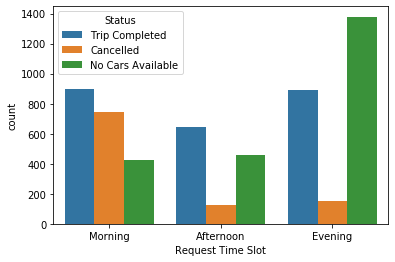

In [39]:
sns.countplot(data=uber_df,x="Request Time Slot", hue="Status")

#### Using Seaborn Plot the Supply Demand Gap for each moment of the day

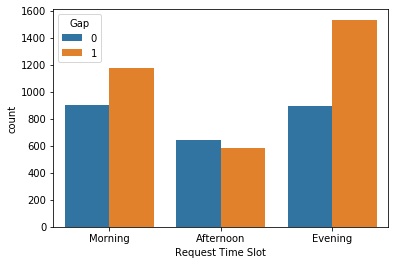

In [40]:
sns.countplot(data=uber_df,x="Request Time Slot", hue="Gap")

### PRODUCT INSIGHTS

What to advise Uber about all this ?